In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [20]:
data = pd.read_csv('../../data/star_classification.csv')
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [21]:
# Counting up the number of tag occurences in class column
data['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [22]:
class_frequency = data['class'].map(len)
class_frequency

0        6
1        6
2        6
3        6
4        6
        ..
99995    6
99996    6
99997    6
99998    6
99999    6
Name: class, Length: 100000, dtype: int64

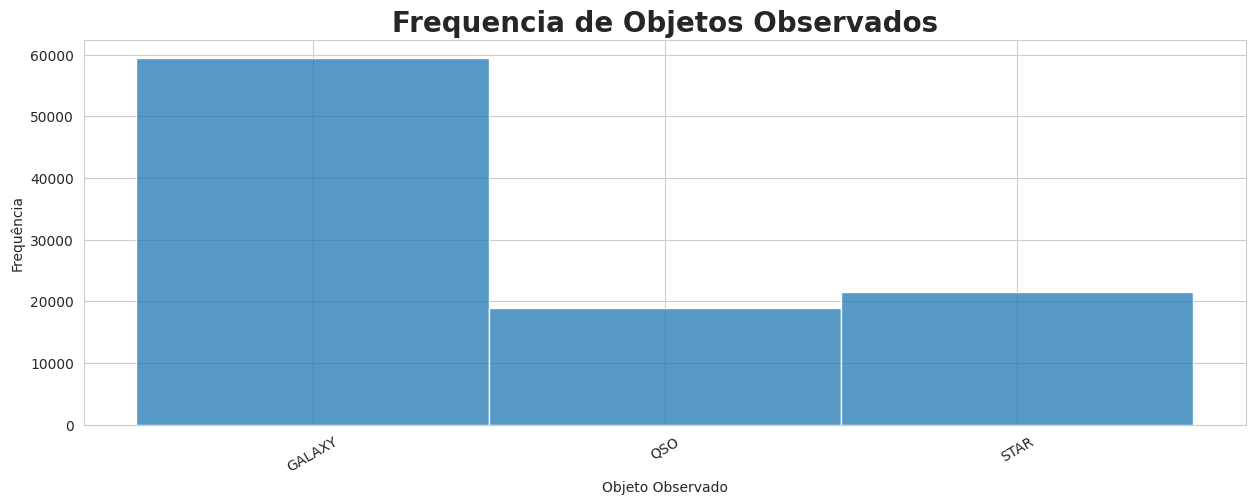

In [23]:
plt.figure(figsize=(15, 5))
plt.title('Frequencia de Objetos Observados', fontsize=20, weight='bold')
sns.histplot(
    data=class_frequency,
    bins=class_frequency.nunique(),
    x= data['class']
)
plt.xticks(rotation=30)
plt.xlabel('Objeto Observado')
plt.ylabel('Frequência')
plt.show()

In [24]:
data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [25]:
# Separating the data into features and target
#import label encoder
from sklearn.preprocessing import LabelEncoder
#creating labelEncoder
le = LabelEncoder()
# Converting string labels into numbers.
data['class']=le.fit_transform(data['class'])
data


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,0,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,0,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,0,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,0,0.455040,6751,56368,470


In [26]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Separating the data into features and target
X = data.drop('class', axis=1)
y = data['class']


In [28]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"=> Train size: {len(X_train)}\tTest size: {len(y_test)}")

=> Train size: 80000	Test size: 20000


In [29]:
# Applying PCA
# pca = PCA(n_components=2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [30]:
# Training the model
model = SVC()
model.fit(X_train, y_train)

SVC()

In [31]:
# Predicting the test set results
y_pred = model.predict(X_test)

In [32]:
# Evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.98      0.75     11860
           1       0.52      0.08      0.15      3797
           2       0.00      0.00      0.00      4343

    accuracy                           0.60     20000
   macro avg       0.38      0.36      0.30     20000
weighted avg       0.46      0.60      0.47     20000



/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 ---> It is now clear that our class data is very imbalanced, therefore we must balance thing out so we can get a better performance from the model

 __*Finding the best weights for the imbalanced classes*__

In [15]:
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"=> Train size: {len(X_train_g)}\tTest size: {len(y_test_g)}")

=> Train size: 80000	Test size: 20000


In [18]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

model = SVC()

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
randomsearch = RandomizedSearchCV(estimator = model, 
                          param_distributions = param_grid,
                          cv = StratifiedKFold(), 
                          n_jobs = -1, 
                          scoring = 'f1', 
                          verbose = 2).fit(X_train_g, y_train_g)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({'score': randomsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)
best_weights = randomsearch.best_params_['class_weight']
best_weights

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.7313065326633166, 1: 0.2686934673366834}; total time=18.4min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.7313065326633166, 1: 0.2686934673366834}; total time=18.6min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.587035175879397, 1: 0.412964824120603}; total time=19.2min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.7313065326633166, 1: 0.2686934673366834}; total time=19.2min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.587035175879397, 1: 0.412964824120603}; total time=19.2min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.7313065326633166, 1: 0.2686934673366834}; total time=19.5min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.7313065326633166, 1: 0.2686934673366834}; total time=19.7min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.09949748743718594, 1: 0.9005025125628141}; total time=26.7min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.09949748743718594, 1: 0.9005025125628141}; total time=26.8min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.09949748743718594, 1: 0.9005025125628141}; total time=28.5min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.09949748743718594, 1: 0.9005025125628141}; total time=30.4min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.09949748743718594, 1: 0.9005025125628141}; total time=30.9min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.8258291457286432, 1: 0.1741708542713568}; total time=16.2min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.8258291457286432, 1: 0.1741708542713568}; total time=16.4min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.8258291457286432, 1: 0.1741708542713568}; total time=16.9min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.8258291457286432, 1: 0.1741708542713568}; total time=20.9min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.587035175879397, 1: 0.412964824120603}; total time=21.9min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.587035175879397, 1: 0.412964824120603}; total time=22.5min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.587035175879397, 1: 0.412964824120603}; total time=22.7min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.8258291457286432, 1: 0.1741708542713568}; total time=17.0min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.8009547738693468, 1: 0.19904522613065323}; total time=17.2min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.8009547738693468, 1: 0.19904522613065323}; total time=15.9min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.8009547738693468, 1: 0.19904522613065323}; total time=18.2min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.8009547738693468, 1: 0.19904522613065323}; total time=16.2min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.8009547738693468, 1: 0.19904522613065323}; total time=22.1min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.5969849246231156, 1: 0.4030150753768844}; total time=22.6min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.5969849246231156, 1: 0.4030150753768844}; total time=23.7min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.5969849246231156, 1: 0.4030150753768844}; total time=19.8min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.5969849246231156, 1: 0.4030150753768844}; total time=21.0min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.5969849246231156, 1: 0.4030150753768844}; total time=21.8min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.9701005025125629, 1: 0.029899497487437143}; total time=12.8min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.9701005025125629, 1: 0.029899497487437143}; total time=12.5min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.34824120603015074, 1: 0.6517587939698493}; total time=32.3min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.34824120603015074, 1: 0.6517587939698493}; total time=34.5min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.34824120603015074, 1: 0.6517587939698493}; total time=34.5min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.34824120603015074, 1: 0.6517587939698493}; total time=34.1min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.402964824120603, 1: 0.597035175879397}; total time=29.9min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.402964824120603, 1: 0.597035175879397}; total time=32.2min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.34824120603015074, 1: 0.6517587939698493}; total time=37.9min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.9701005025125629, 1: 0.029899497487437143}; total time=13.0min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.9701005025125629, 1: 0.029899497487437143}; total time=14.2min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.402964824120603, 1: 0.597035175879397}; total time=30.4min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.9701005025125629, 1: 0.029899497487437143}; total time=13.9min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.402964824120603, 1: 0.597035175879397}; total time=30.7min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.402964824120603, 1: 0.597035175879397}; total time=31.1min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.3880402010050251, 1: 0.6119597989949749}; total time=24.8min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.3880402010050251, 1: 0.6119597989949749}; total time=24.2min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.3880402010050251, 1: 0.6119597989949749}; total time=25.4min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.3880402010050251, 1: 0.6119597989949749}; total time=22.4min


/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/home/joaotaves/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1277, in fbeta_score
    

[CV] END class_weight={0: 0.3880402010050251, 1: 0.6119597989949749}; total time=20.6min


ValueError: All arrays must be of the same length

<Figure size 1200x800 with 0 Axes>